In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf

In [10]:
from sklearn.datasets import load_boston

In [12]:
boston = load_boston() # boston은 Dictionary 형태

In [13]:
X = pd.DataFrame(boston['data'], columns = boston['feature_names']) # Dictionary 형태를 DataFrame 형태로 변환

In [14]:
Y = boston['target']

In [15]:
X.shape

(506, 13)

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Train, Test Data Split

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 20220510)

## Keras를 이용하자!

In [23]:
import tensorflow.keras as keras

In [81]:
# 모델의 아키텍처를 구성 by Keras
model = keras.Sequential()

In [119]:
# Input_Layer
model.add(keras.layers.Dense(units=3, input_shape = (13, ) ,activation = 'sigmoid')) # 선형 결합된 파라미터의 개수? -> 13 * 3 = 39개의 선형 결합

In [120]:
# Hidden_Layer
model.add(keras.layers.Dense(units = 3, activation = 'sigmoid'))

In [121]:
# Output_Layer
model.add(keras.layers.Dense(units = 1, activation = 'linear')) # Regression 모델이므로 activation function은 linear

In [122]:
# 아키텍처 정보를 보기
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 3)                 42        
                                                                 
 dense_24 (Dense)            (None, 3)                 12        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
 dense_26 (Dense)            (None, 3)                 6         
                                                                 
 dense_27 (Dense)            (None, 3)                 12        
                                                                 
 dense_28 (Dense)            (None, 1)                 4         
                                                                 
 dense_29 (Dense)            (None, 3)                

### Loss Function을 결정
### Optimizer를 결정 => SGD(그레디언트 계산 방법) => 최적화 문제를 무엇으로 풀 것인가?

In [123]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate = 0.3))

In [124]:
history = model.fit(Train_X, Train_Y, batch_size = 1, epochs = 50)

Epoch 1/50
404/404 [==============================] - 1s 2ms/step - loss: 226.7894
Epoch 2/50
404/404 [==============================] - 1s 2ms/step - loss: 179.6039
Epoch 3/50
404/404 [==============================] - 1s 2ms/step - loss: 215.7837
Epoch 4/50
404/404 [==============================] - 1s 2ms/step - loss: 226.1342
Epoch 5/50
404/404 [==============================] - 1s 2ms/step - loss: 196.7750
Epoch 6/50
404/404 [==============================] - 1s 2ms/step - loss: 233.8540
Epoch 7/50
404/404 [==============================] - 1s 2ms/step - loss: 229.8561
Epoch 8/50
404/404 [==============================] - 1s 2ms/step - loss: 212.4578
Epoch 9/50
404/404 [==============================] - 1s 2ms/step - loss: 211.3828
Epoch 10/50
404/404 [==============================] - 1s 2ms/step - loss: 213.7664
Epoch 11/50
404/404 [==============================] - 1s 2ms/step - loss: 203.7249
Epoch 12/50
404/404 [==============================] - 1s 2ms/step - loss: 202.6128
E

In [125]:
train_loss = history.history['loss']

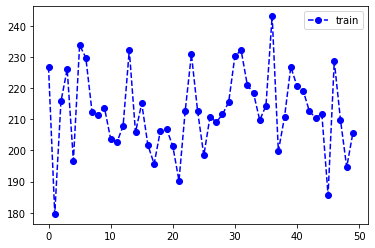

In [126]:
plt.plot(train_loss, '--ob', label = 'train')
plt.legend()
plt.show()

In [127]:
pred_Y = model.predict(Test_X)

In [128]:
pred_Y.shape

(102, 1)

In [129]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [130]:
mse_result = mse(Test_Y, pred_Y)
mae_result = mae(Test_Y, pred_Y)
mape_result = mape(Test_Y, pred_Y)

In [138]:
print("** (1) NN MSE : {:.3f}".format(mse_result))
print("** (2) NN MAE : {:.3f}".format(mae_result))
print("** (3) NN MAPE : {:.3f}".format(mape_result))

** (1) NN MSE : 96.825
** (2) NN MAE : 8.091
** (3) NN MAPE : 0.521


# 다른 모델과 비교해보자

In [132]:
from sklearn.linear_model import LinearRegression as LR

In [133]:
lr = LR()

In [134]:
lr.fit(Train_X, Train_Y)

LinearRegression()

In [135]:
pred_Y_by_LR = lr.predict(Test_X)

In [137]:
lr_mse_result = mse(Test_Y, pred_Y_by_LR)
lr_mae_result = mae(Test_Y, pred_Y_by_LR)
lr_mape_result = mape(Test_Y, pred_Y_by_LR)

In [139]:
print("** (1) LR MSE : {:.3f}".format(lr_mse_result))
print("** (2) LR MAE : {:.3f}".format(lr_mae_result))
print("** (3) LR MAPE : {:.3f}".format(lr_mape_result))

** (1) LR MSE : 24.778
** (2) LR MAE : 3.520
** (3) LR MAPE : 0.197


In [140]:
print("** (1) NN MSE : {:.3f}".format(mse_result))
print("** (2) NN MAE : {:.3f}".format(mae_result))
print("** (3) NN MAPE : {:.3f}".format(mape_result))

** (1) NN MSE : 96.825
** (2) NN MAE : 8.091
** (3) NN MAPE : 0.521


In [ ]:
s